In [42]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
FOLDERNAME = 'CS275B'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import matplotlib.pyplot as plt

CHORALE_NUMBER = 111 # DEFAULT IS 111
user_input = int(input("What Chorale Would You Like To Analyze?\t"))
if (user_input > 0 and user_input < 372):
  CHORALE_NUMBER = user_input
print("Analyzing Chorale", CHORALE_NUMBER)

What Chorale Would You Like To Analyze?	66
Analyzing Chorale 66


In [44]:
not_care = ['{','}','[',']','(',')', '&', '!', ';', 'm', 'W','M','=', 'X', 'L', 'J', 'LL', 'JJ', 'k', 'K', '|', '>', '<', ':', '*'] # all of the symbols we don't care about
def careAbt(char_input):
  return (char_input not in not_care)


note_score = {'c': 0, 'd': 6, 'e': 12, 'f': 17, 'g': 23, 'a': 29, 'b': 35, 'r': 380}
def noteToScore(char_input):
  if char_input in note_score:
    return note_score[char_input]
  raise Exception(char_input, " is not to have a pitch value")


#taken from kern instructions
lower_case_octave = 4
upper_case_octave = 3
offset = 2
octave_jump = 40

#passed in the ccc# with the sharp/flat modifier
def getPitchFromDuplicates(string_encoded):
  build_up = ""
  has_seen_pitch = False
  num_times_seen = 0
  accidentals = 0

  for char_input in string_encoded:
    if char_input in build_up and has_seen_pitch:
      num_times_seen += 1
      #print('char_input', num_times_seen)
    #ascii of letters is between 65 and 122
    if ord(char_input) >= 65 and ord(char_input) <= 122 and char_input not in build_up and not has_seen_pitch:
      build_up = char_input
      #print('pitch is', build_up)
      has_seen_pitch = True
      #print('build_up', build_up)
    
    elif ord(char_input) < 65 or ord(char_input) > 122 and has_seen_pitch:
      if char_input == "n":
        accidentals = 0
      if char_input == "#":
        accidentals = 1
      if char_input == "-":
        accidentals = -1

  octave_amount = 1  
  if build_up != "":
    # pitch value is lower case
    if build_up.lower() == build_up:
      octave_amount = (lower_case_octave + num_times_seen)
    else:
      octave_amount = (upper_case_octave - num_times_seen)
    #print("buildUp is", build_up, " octave_amount ", octave_amount)
    return noteToScore(build_up.lower()) + octave_jump * octave_amount + offset + accidentals
  return -3
    


note_vals = ['0', '1', '2', '4', '8', '16', '32']
#48-57 ascii value
def getScoreValue(string_encoded, past_score):
  if string_encoded == ".":
    return past_score

  score = 0
  index = 0
  while ord(string_encoded[index]) >= 46 and ord(string_encoded[index]) <= 57:
    index += 1
  
  #now past all of the numbers and periods
  return getPitchFromDuplicates(string_encoded[index:])

print("--------- TESTING PITCH RETRIVAL ---------")
print("\t f# score", getScoreValue("2f#", 0))
print("\t f# score", getScoreValue("f#", 0))
print("\t 2fff# score", getScoreValue("2fff#", 1))
print("\t . score", getScoreValue(".", -1))
print("\t . score", getScoreValue(".", 35))
print("\t cc score", getScoreValue("cc", 211))
print("\t A- score", getScoreValue("A-", 133))
print("\t 14214AAAAA# score", getScoreValue("14214AAAAA#", 0))
print("\t 4BB- score", getScoreValue("4BB-", 0))
print("\t 8F score", getScoreValue("8F", 1))
print("\t 4b- score", getScoreValue("4b-", -1))
print("\t 4dd- score", getScoreValue("4dd-", 35))
print("\t CCn score", getScoreValue("CCn", 211))
print("\t 4G- score", getScoreValue("4G-", 133))
print("--------- TESTING PITCH RETRIVAL ---------")


--------- TESTING PITCH RETRIVAL ---------
	 f# score 180
	 f# score 180
	 2fff# score 260
	 . score -1
	 . score 35
	 cc score 202
	 A- score 150
	 14214AAAAA# score -8
	 4BB- score 116
	 8F score 139
	 4b- score 196
	 4dd- score 207
	 CCn score 82
	 4G- score 144
--------- TESTING PITCH RETRIVAL ---------


/content/drive/My Drive/CS275B/chorales/chor066.krn
--------- First three values of notes ---------
	 [128, 139, 151, 168]
	 [128, 145, 151, 174]
	 [128, 151, 168, 179]
--------- First three values of notes ---------


{88: 1,
 94: 1,
 99: 2,
 105: 5,
 111: 14,
 116: 2,
 117: 3,
 122: 12,
 123: 3,
 128: 21,
 134: 21,
 139: 17,
 140: 2,
 145: 15,
 146: 8,
 151: 36,
 156: 5,
 157: 20,
 162: 18,
 163: 9,
 168: 31,
 174: 44,
 179: 14,
 185: 26,
 186: 1,
 191: 22,
 197: 11,
 202: 10,
 208: 11,
 214: 3}

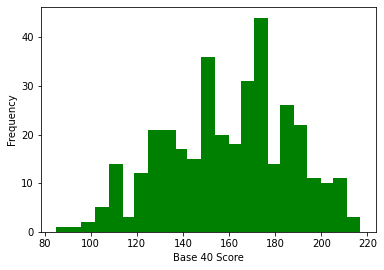

In [45]:
if not isinstance(CHORALE_NUMBER, str):
  if CHORALE_NUMBER < 10:
    CHORALE_NUMBER = "00" + str(CHORALE_NUMBER)
  elif CHORALE_NUMBER < 100:
    CHORALE_NUMBER = "0" + str(CHORALE_NUMBER)

CHORALE_PATH = "/content/drive/My Drive/CS275B/chorales/chor" + str(CHORALE_NUMBER) +".krn"
print(CHORALE_PATH)


reached_interesting = False
notes = {}
note_numb = 1

#note: note_numb is 1-indexed
with open(CHORALE_PATH, 'r') as f:
  line = f.readline()

  while (line):
    #print(line, end="")

    items = line.strip().split("\t")
    if reached_interesting:
      # Save Values
      if "*-" in items[0]:
        reached_interesting = False
      elif "=" is not items[0][0]:
        #print(items)
        item_number = 0
        values = [0] * len(items)
        for item in items:
          stripped_val = ""
          for char in item:
            if careAbt(char): 
              stripped_val += char
        
          if stripped_val != "":
            if note_numb == 1:
              values[item_number] = getScoreValue(stripped_val, 0)
            else:
              values[item_number] = getScoreValue(stripped_val, notes[note_numb - 1][item_number])
            item_number += 1

        notes[note_numb] = values
        note_numb += 1

    if not reached_interesting and "*MM100" in items[0]:
      reached_interesting = True

    line = f.readline()

print("--------- First three values of notes ---------")
if 3 in notes:
  print("\t", notes[1])
  print("\t", notes[2])
  print("\t", notes[3])
print("--------- First three values of notes ---------")
#stars and exclamations not important
#equals signs are bar lines so not important
#2 with a dot dotted half note
#16 is sixteenth note
#24 is a triplet sixteenth

def plotDictFrequencies(a_dict, width=1, X_label=""):
  plot_freq = {}

  for key in a_dict:
    for elem in a_dict[key]:
      if elem not in plot_freq:
        plot_freq[elem] = 0
      plot_freq[elem] += 1
  plt.clf()
  plt.bar(plot_freq.keys(), plot_freq.values(), width, color='g')
  plt.xlabel(X_label)
  plt.ylabel("Frequency")
  spacing = 0.100
  plt.subplots_adjust(bottom=spacing)
  plt.savefig("/content/drive/My Drive/CS275B/plots/" + str(CHORALE_NUMBER) + X_label);
  
  return plot_freq

plotDictFrequencies(notes, 6, "Base 40 Score")

Unknown difference has value of 24
{1: ['P1', 'm3', 'P5', 'P8'], 2: ['P1', 'P4', 'P5', 'M2'], 3: ['P1', 'P5', 'P8', 'm3'], 4: ['P1', 'M6', 'P8', 'm3'], 5: ['P1', 'P8', 'M3', 'P5'], 6: ['P1', 'P5', 'P8', 'M3'], 7: ['P1', 'P8', 'M3', 'P5'], 8: ['P1', 'M7', 'M3', 'P5'], 9: ['P1', 'M6', 'M3', 'P1'], 10: ['P1', 'P5', 'M2', 'm7'], 11: ['P1', 'M3', 'P8', 'P5'], 12: ['P1', 'M3', 'P8', 'P4'], 13: ['P1', 'm3', 'P5', 'P1'], 14: ['P1', 'P5', 'P8', 'm3'], 15: ['P1', 'P1', 'P5', 'm3'], 16: ['P1', 'M3', 'M6', 'M3'], 17: ['P1', 'A4', 'M6', 'M3'], 18: ['P1', 'M6', 'P8', 'M3'], 19: ['P1', 'M6', 'M7', 'M3'], 20: ['P1', 'm3', 'm3', 'm6'], 21: ['P1', 'm3', 'm2', 'd5'], 22: ['P1', 'm3', 'P5', 'm3'], 23: ['P1', 'P4', 'P8', 'm3'], 24: ['P1', 'P8', 'P4', 'P5'], 25: ['P1', 'P8', 'M3', 'P5'], 26: ['P1', 'm3', 'P5', 'P8'], 27: ['P1', 'P1', 'P1', 'P1'], 28: ['P1', 'm3', 'P5', 'P8'], 29: ['P1', 'M3', 'M6', 'M2'], 30: ['P1', 'm3', 'm3', 'm6'], 31: ['P1', 'P4', 'P4', 'm7'], 32: ['P1', 'P8', 'P4', 'P1'], 33: ['P1', 'P

{'A4': 2,
 'M2': 10,
 'M3': 52,
 'M6': 19,
 'M7': 5,
 'P1': 116,
 'P4': 19,
 'P5': 58,
 'P8': 36,
 'UN': 1,
 'd5': 3,
 'm2': 3,
 'm3': 39,
 'm6': 14,
 'm7': 11}

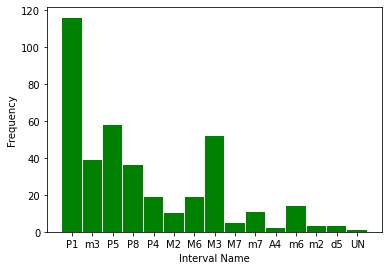

In [46]:
def getSmallestPitch(notes_arr):
  return min(notes_arr)

#takes into account sustained pitches
def getRootPitch(notes_arr, prev_notes_arr):
  for i in range(len(notes_arr)):
    if prev_notes_arr[i] == notes_arr[i]:
      return notes_arr[i]
  return min(notes_arr)

def getRelationship(min_note, other_note):
  return other_note - min_note

# returns "UN" if it does not recognize the interval
#rel_names = {0: "P1", 40: "P8", 23: "P5", 17: "P4", 18: "A4", 19: "AA4", 6: "M2", 5: "m2", 12: "M3", 11: "m3", 34: "m7", 29: "M6", 28: "m6", 35:"M7", 22:"d5", 8: "r", 80: "P15", 63: "P13", 57: "P11", 58: "A11", 59: "AA11", 46: "M9", 45: "m9", 52: "M10", 51: "m10", 74: "m14", 69: "M13", 68: "m13", 75:"M14", 62:"d12", 48: "r"}
rel_names = {0: "P1", 40: "P8", 23: "P5", 17: "P4", 18: "A4", 19: "AA4", 6: "M2", 5: "m2", 12: "M3", 11: "m3", 34: "m7", 29: "M6", 28: "m6", 35:"M7", 22:"d5", 8: "r"}
def getNameRelationship(min_note, other_note):
  rel = getRelationship(min_note, other_note)
  if rel != 40:
     rel %= 40
  if rel in rel_names:
    return rel_names[rel]
  print("Unknown difference has value of", rel)
  return "UN"

def fillRelationships(notes_arr):
  rel_arr = [""] * len(notes_arr)
  smallest = getSmallestPitch(notes_arr)
  for i in range(len(notes_arr)):
    rel_arr[i] = getNameRelationship(smallest, notes_arr[i])
  return rel_arr

rel_dict = {}
def notesToRel(notes_dict):
  iter = 1
  for beat in notes_dict:
    rel_dict[iter] = fillRelationships(notes_dict[beat])
    iter += 1
  return rel_dict

print(notesToRel(notes))
plotDictFrequencies(rel_dict, 0.95, "Interval Name")

In [47]:
ratio_vals = {}
def relToRatios(rel_dict):
  for key in rel_dict:
    ratio_vals[key] = arrRelToRatios(rel_dict[key])
  return ratio_vals

# leave M7, m2, A4, AA4, d5 as those should be crunchy 
# P1 left out as that should be the actual value

# Do things with the difference between pitches: 150 A# --> 3 octaves * ratio for A 

ratios_dict = {"P1": 1, "P8": 2, "P5": 1.5, "P4": 1.333, "M2": 1.125, "M3": 1.25, "m3": 1.2, "m7": 1.778, "M6": 1.667, "m6": 1.6, "P15": 4, "P12": 3, "P11": 2*4/3, "M9": 9/4, "M10": 5/2, "m10": 12/5, "m14": 32/9, "M12": 10/3, "m12": 16/5}
def arrRelToRatios(rel_arr):
  ratio_arr = [-1] * len(rel_arr)

  for i in range(len(rel_arr)):
    if rel_arr[i] in ratios_dict:
      ratio_arr[i] = ratios_dict[rel_arr[i]]
  return ratio_arr

print(relToRatios(rel_dict))


{1: [1, 1.2, 1.5, 2], 2: [1, 1.333, 1.5, 1.125], 3: [1, 1.5, 2, 1.2], 4: [1, 1.667, 2, 1.2], 5: [1, 2, 1.25, 1.5], 6: [1, 1.5, 2, 1.25], 7: [1, 2, 1.25, 1.5], 8: [1, -1, 1.25, 1.5], 9: [1, 1.667, 1.25, 1], 10: [1, 1.5, 1.125, 1.778], 11: [1, 1.25, 2, 1.5], 12: [1, 1.25, 2, 1.333], 13: [1, 1.2, 1.5, 1], 14: [1, 1.5, 2, 1.2], 15: [1, 1, 1.5, 1.2], 16: [1, 1.25, 1.667, 1.25], 17: [1, -1, 1.667, 1.25], 18: [1, 1.667, 2, 1.25], 19: [1, 1.667, -1, 1.25], 20: [1, 1.2, 1.2, 1.6], 21: [1, 1.2, -1, -1], 22: [1, 1.2, 1.5, 1.2], 23: [1, 1.333, 2, 1.2], 24: [1, 2, 1.333, 1.5], 25: [1, 2, 1.25, 1.5], 26: [1, 1.2, 1.5, 2], 27: [1, 1, 1, 1], 28: [1, 1.2, 1.5, 2], 29: [1, 1.25, 1.667, 1.125], 30: [1, 1.2, 1.2, 1.6], 31: [1, 1.333, 1.333, 1.778], 32: [1, 2, 1.333, 1], 33: [1, 2, 1.25, 1], 34: [1, 1.5, 2, 1.25], 35: [1, 1.5, 1.125, 1.25], 36: [1, -1, 1.333, 1.778], 37: [1, 1.2, 1.5, 1], 38: [1, 1.5, 2, 1.333], 39: [1, 1.333, 2, 1.333], 40: [1, 1.5, 1, 1.25], 41: [1, 1.2, 1.5, 1], 42: [1, 1.2, 1.5, 2], 43

In [48]:
# TODO
# google drive for the audio examples (mp3)
# github online (if time)/google 
# send latex (experiment with 2 coloumn if time)


# human response - icmpc, icmc (adaptive tuning)
# leave M7, m2, A4, AA4, d5 as those should be crunchy 
# P1 left out as that should be the actual value

# Do things with the difference between pitches: 150 A# --> 3 octaves * ratio for A 
ratios_num_dict = {0: 1, 40: 2, 23: 1.5, 17: 1.333, 6: 9/8, 12: 5/4, 11: 6/5, 34: 1.778, 35: 15/8, 22: 1.422, 18: 1.406, 5: 10/9, 29: 1.667, 28: 8/5}

def getSmallestPitch(notes_arr):
  return min(notes_arr)

#takes into account sustained pitches
def getRootPitch(notes_arr, prev_notes_arr):
  for i in range(len(notes_arr)):
    if prev_notes_arr[i] == notes_arr[i]:
      return notes_arr[i]
  return min(notes_arr)

def getRelationship(min_note, other_note):
  return other_note - min_note

def getRatioRelationship(min_note, other_note):
  rel = getRelationship(min_note, other_note)
  scale_factor = 2 ** (rel // 40)
  if rel < 0:
    scale_factor *= -1
  if rel % 40 in ratios_num_dict:
    return ratios_num_dict[rel % 40] * scale_factor
  print("octave/ratio not found", rel)
  return "."

def fillRatioRelationships(notes_arr):
  ratio_rel_arr = ["."] * len(notes_arr)
  smallest = getSmallestPitch(notes_arr)
  for i in range(len(notes_arr)):
    ratio_rel_arr[i] = getRatioRelationship(smallest, notes_arr[i])
  return ratio_rel_arr

ratio_vals_dict = {}
def notesToRel(notes_dict):
  iter = 1
  for beat in notes_dict:
    ratio_vals_dict[iter] = fillRatioRelationships(notes_dict[beat])
    iter += 1
  return ratio_vals_dict

print(notesToRel(notes))

octave/ratio not found 64
{1: [1, 1.2, 1.5, 2], 2: [1, 1.333, 1.5, 2.25], 3: [1, 1.5, 2, 2.4], 4: [1, 1.667, 2, 2.4], 5: [1, 2, 2.5, 3.0], 6: [1, 1.5, 2, 2.5], 7: [1, 2, 2.5, 3.0], 8: [1, 1.875, 2.5, 3.0], 9: [1, 1.667, 2.5, 4], 10: [1, 1.5, 2.25, 3.556], 11: [1, 1.25, 2, 3.0], 12: [1, 1.25, 2, 2.666], 13: [1, 2.4, 3.0, 4], 14: [1, 1.5, 2, 2.4], 15: [1, 1, 1.5, 2.4], 16: [1, 1.25, 1.667, 2.5], 17: [1, 1.406, 1.667, 2.5], 18: [1, 1.667, 2, 2.5], 19: [1, 1.667, 1.875, 2.5], 20: [1, 1.2, 2.4, 3.2], 21: [1, 1.2, 2.2222222222222223, 2.844], 22: [1, 1.2, 1.5, 2.4], 23: [1, 1.333, 2, 2.4], 24: [1, 2, 2.666, 3.0], 25: [1, 2, 2.5, 3.0], 26: [1, 1.2, 1.5, 2], 27: [1, 1, 1, 1], 28: [1, 1.2, 1.5, 2], 29: [1, 1.25, 1.667, 2.25], 30: [1, 1.2, 2.4, 3.2], 31: [1, 1.333, 2.666, 3.556], 32: [1, 2, 2.666, 4], 33: [1, 2, 2.5, 4], 34: [1, 1.5, 2, 2.5], 35: [1, 1.5, 2.25, 2.5], 36: [1, 2.2222222222222223, 2.666, 3.556], 37: [1, 2.4, 3.0, 4], 38: [1, 1.5, 2, 2.666], 39: [1, 1.333, 2, 2.666], 40: [1, 3.0, 4, 

In [49]:
def getRefPitch(line_str):
  result = ""
  items = line_str.split("\t")
  if items[0] == ".":
    return -1
  refPitch = refPitchVal(items[0])
  for item in items:
    result += "*ref:" + refPitch + "\t"
  result += "\n"
  return result


#passed in the ccc# with the sharp/flat modifier
def pitchLetterFromDuplicates(string_encoded):
  build_up = ""
  has_seen_pitch = False
  num_times_seen = 0
  accidentals = 0

  for char_input in string_encoded:
    if char_input in build_up and has_seen_pitch:
      num_times_seen += 1
      #print('char_input', num_times_seen)
    #ascii of letters is between 65 and 122
    if ord(char_input) >= 65 and ord(char_input) <= 122 and char_input not in build_up and not has_seen_pitch:
      build_up = char_input
      #print('pitch is', build_up)
      has_seen_pitch = True
      #print('build_up', build_up)
    
    elif ord(char_input) < 65 or ord(char_input) > 122 and has_seen_pitch:
      if char_input == "n":
        accidentals = 0
      if char_input == "#":
        accidentals = 1
      if char_input == "-":
        accidentals = -1

  octave_amount = 4  
  if build_up != "":
    # pitch value is lower case
    if build_up.lower() == build_up:
      octave_amount += num_times_seen
    else:
      octave_amount -= num_times_seen + 1
    #print("buildUp is", build_up, " octave_amount ", octave_amount)
  
  if accidentals == 0:
    return str(build_up.upper() + str(octave_amount))
  if accidentals == 1:
    return str(build_up.upper() + "#" + str(octave_amount))
  if accidentals == -1:
    return str(build_up.upper() + "f" + str(octave_amount))

  return 
    

def refPitchVal(originalNoteVal):
  index = 0
  while (ord(originalNoteVal[index]) >= 46 and ord(originalNoteVal[index]) <= 57) or (ord(originalNoteVal[index]) >= 90 and ord(originalNoteVal[index]) <= 96):
    index += 1
  
  #now past all of the numbers and periods
  return pitchLetterFromDuplicates(originalNoteVal[index:])

print(getRefPitch("GG\tG\tg\tgg"), end="")
print(getRefPitch("5GG#\tB-\t31C#\t4ccc"), end="")

*ref:G2	*ref:G2	*ref:G2	*ref:G2	
*ref:G#2	*ref:G#2	*ref:G#2	*ref:G#2	


In [50]:
#ratio_vals is -1 whenever u want to keep the same note from the original humdrum
#note: note_numb is 1-indexed
def writeToHumdrum(ratio_vals):
  OUTPUT_CHORALE_PATH = "/content/drive/My Drive/CS275B/humdrum_outputs/chor" + str(CHORALE_NUMBER) +".krn"
  f_out = open(OUTPUT_CHORALE_PATH, "w")
  reached_interesting = False
  note_numb = 1
  with open(CHORALE_PATH, 'r') as f:
    line = f.readline()

    while (line):
      cpy_line = line
      print(line, end="")

      items = line.strip().split("\t")
      if reached_interesting:
        # Save Values
        if "*-" in items[0]:
          reached_interesting = False

        elif "=" is not items[0][0]:
          
          references = getRefPitch(line)
          #print(references)
          if references != -1:
            f_out.write(getRefPitch(line))

          #print(items)
          item_number = 0
          values = [0] * len(items)
          index = 0
          #cpy_line = cpy_line.replace(".", "dddddd")
          for item in items:
            if item == ".":
              item = "dddddd"
            stripped_val = ""
            for char in item:
              if careAbt(char): 
                stripped_val += char
          
            if stripped_val != "":
              #cpy_line = cpy_line[:index]
              #print(cpy_line)
              #print("stripped_val", stripped_val, " ratio_vals[note_numb][item_number]", ratio_vals[note_numb][item_number])
              cpy_line = cpy_line.replace(stripped_val, str(ratio_vals[note_numb][item_number]))
              #cpy_line += cpy_string
              #print(cpy_line, end="")
              index += len(stripped_val) + 1
              item_number += 1

          note_numb += 1
          f_out.write(cpy_line)
        else:
          f_out.write(cpy_line)


      if not reached_interesting:
        if "**kern" in cpy_line:
          f_out.write("**ratio\t**ratio\t**ratio\t**ratio\n")
        else:
          f_out.write(cpy_line)
      if not reached_interesting and "*MM100" in items[0]:
        reached_interesting = True

      line = f.readline()


writeToHumdrum(ratio_vals_dict)


'''

* star lines should not be processed
L, J, ; do not care
! lines should not be processed
round off the numbers ot half the number of significant digits (for beauty)


'''

!!!COM: Bach, Johann Sebastian
!!!CDT: 1685/02/21/-1750/07/28/
!!!OTL@@DE: Christ, unser Herr zum Jordan kam
!!!SCT: BWV 280
!!!PC#: 66
!!!AGN: chorale
**kern	**kern	**kern	**kern
*ICvox	*ICvox	*ICvox	*ICvox
*Ibass	*Itenor	*Ialto	*Isoprn
*I"Bass	*I"Tenor	*I"Alto	*I"Soprano
*>[A,A,B]	*>[A,A,B]	*>[A,A,B]	*>[A,A,B]
*>norep[A,B]	*>norep[A,B]	*>norep[A,B]	*>norep[A,B]
*>A	*>A	*>A	*>A
*clefF4	*clefGv2	*clefG2	*clefG2
*k[]	*k[]	*k[]	*k[]
*a:	*a:	*a:	*a:
*M4/4	*M4/4	*M4/4	*M4/4
*met(c)	*met(c)	*met(c)	*met(c)
*MM100	*MM100	*MM100	*MM100
4D	8FL	4A	8dL
.	8GJ	.	8eJ
=1	=1	=1	=1
4D	8AL	4d	4f
.	8BJ	.	.
4C	4c	4e	4g
4F	4c	4f	4a
4C	8cL	4e	4g
.	8BJ	.	.
=2	=2	=2	=2
8CL	4A	4e	4cc
8DJ	.	.	.
4E	4G#	4e	8bL
.	.	.	8aJ
4AA;	4c;	4e;	4a;
4E	4B	4e	4gnX
=3	=3	=3	=3
4A	4A	4e	4cc
4GnX	8BL	4e	4b
.	8c#J	.	.
4F	4d	8fL	4a
.	.	8eJ	.
8BBL	8DL	4d	4g
8C#XJ	8EJ	.	.
=4	=4	=4	=4
4D	8FL	8A	4f
.	8GJ	4d	.
4AA	4A	.	4e
.	.	8c#	.
4D;	4F;	4A;	4d;
=:|!	=:|!	=:|!	=:|!
*>B	*>B	*>B	*>B
8DL	8FL	4A	4d
8CnXJ	8EJ	.	.
=5	=5	=5	=5
8BBL	4D	4d	4g

'\n\n* star lines should not be processed\nL, J, ; do not care\n! lines should not be processed\nround off the numbers ot half the number of significant digits (for beauty)\n\n\n'

In [51]:
"""
!!!COM: Bach, Johann Sebastian
!!!CDT: 1685/02/21/-1750/07/28/
!!!OTL@@DE: Es ist das Heil uns kommen her
!!!SCT: BWV 86/6
!!!PC#: 4
!!!AGN: chorale
**ratio	**ratio	**ratio	**ratio
*ref:E3	*ref:E3	*ref:E3	*ref:E3
*ICvox	*ICvox	*ICvox	*ICvox
*Ibass	*Itenor	*Ialto	*Isoprn
*I#52  *I#52   *I#52   *I#52
*>[A,A,B]	*>[A,A,B]	*>[A,A,B]	*>[A,A,B]
*>norep[A,B]	*>norep[A,B]	*>norep[A,B]	*>norep[A,B]
*>A	*>A	*>A	*>A
*clefF4	*clefGv2	*clefG2	*clefG2
*k[f#c#g#d#]	*k[f#c#g#d#]	*k[f#c#g#d#]	*k[f#c#g#d#]
*E:	*E:	*E:	*E:
*M4/4	*M4/4	*M4/4	*M4/4
*met(c)	*met(c)	*met(c)	*met(c)
*MM25	*MM25	*MM25	*MM25
1	2	2.5	4
=1	=1	=1	=1
*ref:D#3	*ref:D#3	*ref:D#3	*ref:D#3
1	2.4	2.4	4
.	.	2.6666666666666665	.
*ref:B2	*ref:B2	*ref:B2	*ref:B2
1	2.6666666666666665	3.5555555555555554	4
.	2.5	.	.
1	2	2.5	4
1	1.2	2	4
1	1.2	.	.
=2	=2	=2	=2
1	1.25	1.5	2.5
.	1.3333333333333333	.	.
.	1.5	2	.
1	.	.	4
.	1.7777777777777777	2.5	.
1	2.5	-1	4
1	1.6	2.4	-1
=3	=3	=3	=3
1	1.5	2	2.5
1	.	.	.
1	.	1.6	1.6
.	-1	1.5J	1.7777777777777777J
1	1.5	2.4	-1
1L	1	1.5	2.5
1J	.	.	.
=4	=4	=4	=4
1L	1.2	2.4L	-1
1L	1.7777777777777777	2.4L	.
1JJ	.	2.5JJ	.
1	.	1.7777777777777777	-1
.	1.25	.	.
1;	1.5;	2.5;	4;
=:|!	=:|!	=:|!	=:|!
*>B	*>B	*>B	*>B
1	1.25	2L	-1
.	.	2.25J	.
=5	=5	=5	=5
1	2	-1L	1.2
.	.	-1J	.
1L	1.2	-1	4
1J	.	.	.
1	2	2.5	-1
1	1.5	2	2.5
=6	=6	=6	=6
1L	1.2	2.4	-1L
1J	.	.	-1J
1	1.25	2	-1
1;	2.5;	-1;	4;
1	2	2.5	-1
=7	=7	=7	=7
1	1.2	1.6L	-1
.	.	1.7777777777777777J	.
1	2	2.5	-1
1XL	1.5	2	2.5
1J	.	.	.
1	1	1.2L	1.5L
.	.	1.3333333333333333J	1.6J
=8	=8	=8	=8
1	-1	2.4	-1
1	1.5	2	2.4
1;	2;	2.5;	-1;
1	[1.5	2	2.5
=9	=9	=9	=9
1	2]	2.5	-1
1L	2.4	2	-1
1J	.	.	.
1	2	1.5	2.5
1	2.5L	2	-1
.	2J	.	.
=10	=10	=10	=10
1	1.6	2.4	2.4
1	.	2	2.5
1;	2.5;	-1;	4;
==	==	==	==
*-	*-	*-	*-
!!!hum2abc: -Q ''
!!!title: @{PC#}. @{OTL@@DE}
!!!YOR1: 371 vierstimmige Choralgesänge von Johann Sebastian Bach,
!!!YOR2: 4th ed. by Alfred Dörffel (Leipzig: Breitkopf und Härtel,
!!!YOR2: c.1875). 178 pp. Plate "V.A.10".  reprint: J.S. Bach, 371 Four-Part
!!!YOR4: Chorales (New York: Associated Music Publishers, Inc., c.1940).
!!!SMS: B&H, 4th ed, Alfred Dörffel, c.1875, plate V.A.10
!!!EED:  Craig Stuart Sapp
!!!EEV:  2009/05/22
"""

'\n!!!COM: Bach, Johann Sebastian\n!!!CDT: 1685/02/21/-1750/07/28/\n!!!OTL@@DE: Es ist das Heil uns kommen her\n!!!SCT: BWV 86/6\n!!!PC#: 4\n!!!AGN: chorale\n**ratio\t**ratio\t**ratio\t**ratio\n*ref:E3\t*ref:E3\t*ref:E3\t*ref:E3\n*ICvox\t*ICvox\t*ICvox\t*ICvox\n*Ibass\t*Itenor\t*Ialto\t*Isoprn\n*I#52  *I#52   *I#52   *I#52\n*>[A,A,B]\t*>[A,A,B]\t*>[A,A,B]\t*>[A,A,B]\n*>norep[A,B]\t*>norep[A,B]\t*>norep[A,B]\t*>norep[A,B]\n*>A\t*>A\t*>A\t*>A\n*clefF4\t*clefGv2\t*clefG2\t*clefG2\n*k[f#c#g#d#]\t*k[f#c#g#d#]\t*k[f#c#g#d#]\t*k[f#c#g#d#]\n*E:\t*E:\t*E:\t*E:\n*M4/4\t*M4/4\t*M4/4\t*M4/4\n*met(c)\t*met(c)\t*met(c)\t*met(c)\n*MM25\t*MM25\t*MM25\t*MM25\n1\t2\t2.5\t4\n=1\t=1\t=1\t=1\n*ref:D#3\t*ref:D#3\t*ref:D#3\t*ref:D#3\n1\t2.4\t2.4\t4\n.\t.\t2.6666666666666665\t.\n*ref:B2\t*ref:B2\t*ref:B2\t*ref:B2\n1\t2.6666666666666665\t3.5555555555555554\t4\n.\t2.5\t.\t.\n1\t2\t2.5\t4\n1\t1.2\t2\t4\n1\t1.2\t.\t.\n=2\t=2\t=2\t=2\n1\t1.25\t1.5\t2.5\n.\t1.3333333333333333\t.\t.\n.\t1.5\t2\t.\n1\t.\t.\t4\n.\t1.7